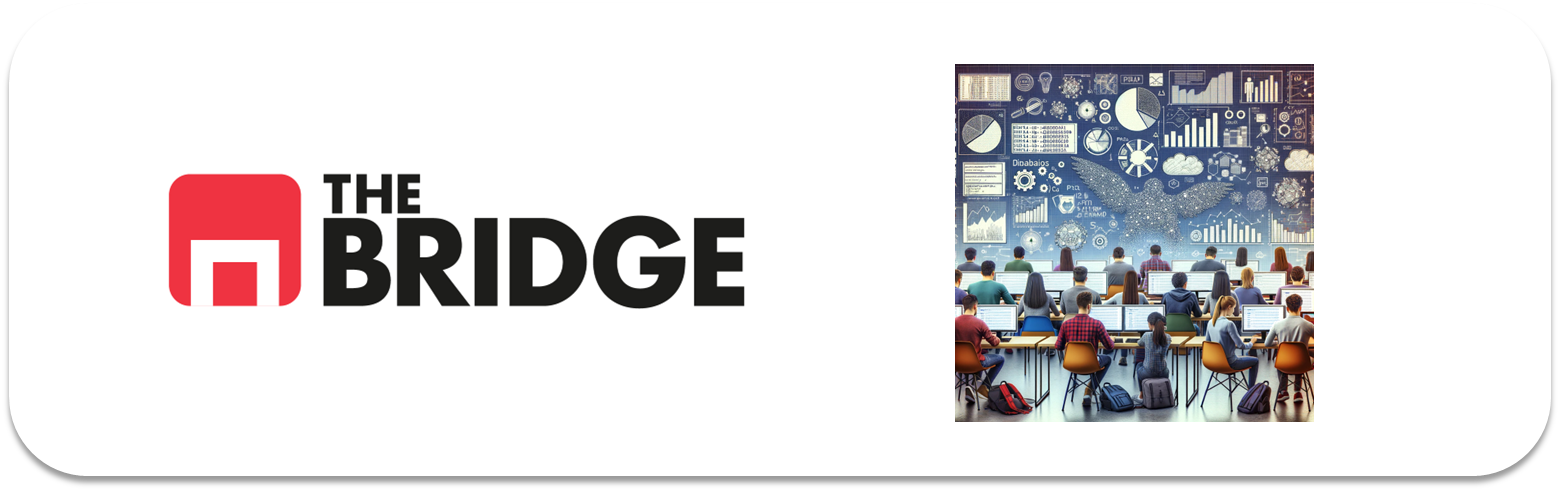

## TEAM CHALLENGE: TOOLBOX (I)

Este notebook describe la primera parte del team challenge dedicado a construir un módulo de herramientas básicas para poder preparar la creación de modelos de Machine Learning de una forma más sencilla. 

En esta primera parte, el grupo debe crear un conjunto de funciones que se describen a continuación y crear con ellas un módulo en script "toolbox_ML.py".

Este módulo se empleará en la segunda parte del challenge para resolver un problema de Machine Learning.

### Entregables
Por lo tanto, **se pide:**  
**1. Entregar un script "toolbox_ML.py" que contenga el código comentado que implemente las funciones descritas y especificadas en el apartado [fuciones]. La entrega se hará en el repositorio del grupo.**  
**2. Hacer una descripción del código creado en una breve presentación de 20 minutos, empleando para ello un ejemplo diseñado por el grupo**  
**3. Entregar el código del ejemplo (esto debería ser un notebook, pero puede ser también un script) también en el repositorio del grupo**  

### Plazos
Tendremos 2 sesiones de team challenge para crear el código y una sesión de presentación a partir de la presentación de esta parte.



### Funciones

El objetivo de las funciones que se especifican a continuación es ayudar a realizar el análisis y selección de features de la forma más flexible y rápida posible, dado un problema de Machine Learning concreto.

**Todas las funciones deben llevar comentado el código y deben incluir un docstring especificando su uso**, según la siguiente guía:

Un "docstring" en Python es una cadena de texto utilizada para documentar módulos, clases, métodos y funciones. El propósito de un docstring es explicar brevemente qué hace la función y cómo se debe utilizar. Los docstrings se encierran entre tres comillas dobles (""") al inicio y al final, y se colocan justo después de la definición de la función. Aquí hay un formato típico de un docstring para una función en Python:

```python
def mi_funcion(param1, param2):
    """
    Descripción breve de lo que hace la función.

    Argumentos:
    param1 (tipo): Descripción de param1.
    param2 (tipo): Descripción de param2.

    Retorna:
    tipo: Descripción de lo que retorna la función.
    """
    
    # El cuerpo de la función va aquí
    pass
```

En este formato:

1. **Primera línea**: Breve descripción de la función.
2. **Sección de Argumentos**: Lista cada parámetro, su tipo esperado y una breve descripción de su propósito.
3. **Sección de Retorna**: Describe el tipo y el propósito del valor que la función retorna.



In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, pearsonr

In [174]:
dfw = pd.read_csv('WineQT.csv')

In [175]:
dfw['quality_cat'] = pd.cut(dfw['quality'],
                                        bins=[2, 5, 6, 9],
                                        # 3-4 Bajo, 5 Medio, 6-7-8 Alto
                                        labels=['Bajo', 'Medio', 'Alto'],
                                        right=False)

dfw['quality_cat_6'] = dfw['quality'].replace({3:'MuyBajo',4:'Bajo',5:'Medio',6:'Okey',7:'Bueno',8:'MuyBueno'})


In [176]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1142 non-null   float64 
 1   volatile acidity      1143 non-null   float64 
 2   citric acid           1143 non-null   float64 
 3   residual sugar        1143 non-null   float64 
 4   chlorides             1143 non-null   float64 
 5   free sulfur dioxide   1143 non-null   float64 
 6   total sulfur dioxide  1143 non-null   float64 
 7   density               1143 non-null   float64 
 8   pH                    1143 non-null   float64 
 9   sulphates             1143 non-null   float64 
 10  alcohol               1143 non-null   float64 
 11  quality               1143 non-null   int64   
 12  Id                    1143 non-null   int64   
 13  quality_cat           1143 non-null   category
 14  quality_cat_6         1143 non-null   object  
dtypes: c

### Funcion: describe_df

Esta función debe recibir como argumento un dataframe y debe devolver una dataframe como el de la imagen (no el de la imagen). Es decir un dataframe que tenga una columna por cada columan del dataframe original y como filas, los tipos de las columnas, el tanto por ciento de valores nulos o missings, los valores únicos y el porcentaje de cardinalidad. 

La figura muestra el resultado esperado de llamar a la función pedida con el dataset del titanic:
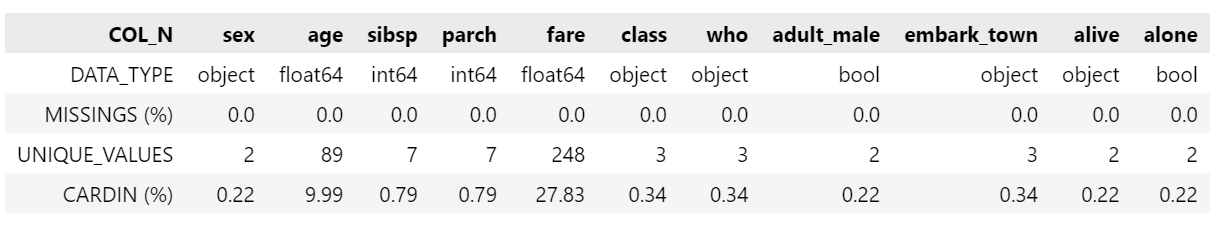
    

In [183]:
def describe_df(df):
    '''
    Describe el dtype de cada columna, los valores nulos en %, quantos valores únicos hay en la columna y el % de cardinalidad.

    Argumentos:
    data(pd.DataFrame): DataFrame de Pandas inicial

    Retorna:
    pd.DataFrame: Data inicial transformado con los valores descritos   
    '''
    resumen = pd.DataFrame({
        'Tipo de dato': df.dtypes,
        'Porcentaje de nulos': round(df.isnull().mean() * 100,2),
        'Valores únicos': df.nunique()
    })
    resumen['Porcentaje de cardinalidad'] = round(resumen['Valores únicos'] / len(df) * 100,2)
    return resumen.transpose()

In [184]:
describe_df(dfw)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,quality_cat,quality_cat_6
Tipo de dato,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,category,object
Porcentaje de nulos,0.09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valores únicos,91,135,77,80,131,53,138,388,87,89,61,6,1143,3,6
Porcentaje de cardinalidad,7.96,11.81,6.74,7.0,11.46,4.64,12.07,33.95,7.61,7.79,5.34,0.52,100.0,0.26,0.52


### Funcion: tipifica_variables

Esta función debe recibir como argumento un dataframe, un entero (`umbral_categoria`) y un float (`umbral_continua`). La función debe devolver un dataframe con dos columnas "nombre_variable", "tipo_sugerido" que tendrá tantas filas como columnas el dataframe. En cada fila irá el nombre de una de las columnas y una sugerencia del tipo de variable. Esta sugerencia se hará siguiendo las siguientes pautas:
+ Si la cardinalidad es 2, asignara "Binaria"
+ Si la cardinalidad es menor que `umbral_categoria` asignara "Categórica"
+ Si la cardinalidad es mayor o igual que `umbral_categoria`, entonces entra en juego el tercer argumento:
    * Si además el porcentaje de cardinalidad es superior o igual a `umbral_continua`, asigna "Numerica Continua"
    * En caso contrario, asigna "Numerica Discreta"


In [186]:
# Simple funcion para clasificar y que el código quede mas bonito
def _classify(data: pd.DataFrame, key: str,  umbral_categoria:int, umbral_continua:float) -> str: 
    cardi = data[key].nunique() 
    if cardi == 2: # ¿La cardinalidad es igual que dos?
        return "Binaria"
    elif cardi < umbral_categoria: # ¿La cardinalidad es mas pequeña que el número que escogemos para considerar una variable categórica?
        return "Categórica"
    elif cardi/len(data[key])*100 >= umbral_continua: # ¿El % de la cardinalidad es mayor o igual que el número que escogemos para delimitar cuando és Continua o Discreta?
        return "Numérica Continua"
    else:
        return "Numérica Discreta"
        

def tipifica_variable (data:pd.DataFrame, umbral_categoria:int, umbral_continua:float) -> pd.DataFrame:
    '''
    Tipo de variable de cada columna según su cardinalidad.

    Argumentos:
    data(pd.DataFrame): DataFrame inicial
    umbral_categoria(int): Número que escogemos para delimitar a partir de cuanto consideramos que es una variable categorica
    umbral_continua(float): Número que escogemos para delimitar a partir de cuanto una variable numérica es discreta
    
    Retorna:
    pd.DataFrame: Data inicial transformado   
    '''
    # Diccionario con los resultados de las preguntas sobre la cardinalidad
    dic_tip_var = {
        "tipo_sugerido": [_classify(data, key, umbral_categoria, umbral_continua) for key in data]
    }
    # Añadimos un extra, simple print para tener en cuenta si hay valores nulos no tratados en el dataframe
    for x in data:
        hay_nulos = data[x].isnull().sum()
        if hay_nulos != 0:
            print(f'OJO! En la columna "{x}" hay valores nulos.')

    return pd.DataFrame(dic_tip_var, index=[x for x in data])

In [185]:
tipifica_variables(dfw,10,10)

,nombre_variable,tipo_sugerido
0,fixed acidity,Numérica Discreta
1,volatile acidity,Numérica Continua
2,citric acid,Numérica Discreta
3,residual sugar,Numérica Discreta
4,chlorides,Numérica Continua
5,free sulfur dioxide,Numérica Discreta
6,total sulfur dioxide,Numérica Continua
7,density,Numérica Continua
8,pH,Numérica Discreta
9,sulphates,Numérica Discreta


In [187]:
dfw.iloc[0,0] = 7.4

### Funcion: get_features_num_regression

Esta función recibe como argumentos un dataframe, el nombre de una de las columnas del mismo (argumento 'target_col'), que debería ser el target de un hipotético modelo de regresión, es decir debe ser una variable numérica continua o discreta pero con alta cardinalidad, además de un argumento 'umbral_corr', de tipo float que debe estar entre 0 y 1 y una variable float "pvalue" cuyo valor debe ser por defecto "None".

La función debe devolver una lista con las columnas numéricas del dataframe cuya correlación con la columna designada por "target_col" sea superior en valor absoluto al valor dado por "umbral_corr". Además si la variable "pvalue" es distinta de None, sólo devolvera las columnas numéricas cuya correlación supere el valor indicado y además supere el test de hipótesis con significación mayor o igual a 1-pvalue.

La función debe hacer todas las comprobaciones necesarias para no dar error como consecuecia de los valores de entrada. Es decir hará un check de los valores asignados a los argumentos de entrada y si estos no son adecuados debe retornar None y printar por pantalla la razón de este comportamiento. Ojo entre las comprobaciones debe estar que "target_col" hace referencia a una variable numérica continua del dataframe.

In [188]:
def get_features_num_regression(df, target_col, umbral_corr, pvalue=None):
    """
    Esta función devuelve las columnas numéricas del dataframe que tienen una correlación significativa con la columna de target.

    Argumentos:
    df (DataFrame): El dataframe a analizar.
    target_col (str): Nombre de la columna que será el target.
    umbral_corr (float): Umbral de correlación para considerar una variable como relevante.
    pvalue (float, opcional): Valor p para el test de hipótesis. Por defecto es None.

    Retorna:
    list: Una lista con los nombres de las columnas numéricas que cumplen con los criterios de correlación y p-value.
    """

    if umbral_corr > 1 or umbral_corr < 0:
        print("Error: 'umbral_corr' debe ser un valor entre 0 y 1.")
        return None
    
    if pvalue is not None and (pvalue <= 0 or pvalue >= 1):
        print("Error: 'pvalue' debe ser un valor entre 0 y 1.")
        return None
        
    features = []
    for col in df.select_dtypes(include=[np.number]).columns:
        if col != target_col:
            corr, pval = stats.pearsonr(df[col].dropna(), df[target_col].dropna())
            if abs(corr) >= umbral_corr and (pvalue is None or pval <= pvalue):
                features.append(col)
    return features

In [189]:
get_features_num_regression(dfw, 'quality', 0.2, pvalue=0.05) 


['volatile acidity', 'citric acid', 'sulphates', 'alcohol']

### Funcion: plot_features_num_regression

Esta función recibe un dataframe, una argumento "target_col" con valor por defecto "", una lista de strings ("columns") cuyo valor por defecto es la lista vacía, un valor de correlación ("umbral_corr", con valor 0 por defecto) y un argumento ("pvalue") con valor "None" por defecto.

Si la lista no está vacía, la función pintará una pairplot del dataframe considerando la columna designada por "target_col" y aquellas incluidas en "column" que cumplan que su correlación con "target_col" es superior en valor absoluto a "umbral_corr", y que, en el caso de ser pvalue diferente de "None", además cumplan el test de correlación para el nivel 1-pvalue de significación estadística. La función devolverá los valores de "columns" que cumplan con las condiciones anteriores. 

EXTRA: Se valorará adicionalmente el hecho de que si la lista de columnas a pintar es grande se pinten varios pairplot con un máximo de cinco columnas en cada pairplot (siendo siempre una de ellas la indicada por "target_col")

Si la lista está vacía, entonces la función igualará "columns" a las variables numéricas del dataframe y se comportará como se describe en el párrafo anterior.

De igual manera que en la función descrita anteriormente deberá hacer un check de los valores de entrada y comportarse como se describe en el último párrafo de la función `get_features_num_regresion`

In [190]:
def plot_features_num_regression(df, target_col="", umbral_corr=0, pvalue=None):
    """
    Visualiza gráficos de dispersión para características numéricas en relación con una columna objetivo de un modelo de regresión.

    Argumentos:
    df (pandas.DataFrame): El DataFrame del que se obtienen las características.
    target_col (str, opcional): El nombre de la columna que debe ser el objetivo del modelo de regresión. Por defecto es "".
    umbral_corr (float, opcional): Umbral de correlación para considerar una característica como significativa. Por defecto es 0.
    pvalue (float, opcional): Valor de p para realizar el test de hipótesis. Por defecto es None.

    Retorna:
    list or None: Una lista con las características que cumplen con los criterios especificados, o None si hay errores.
    """
    selected_features = get_features_num_regression(df, target_col, umbral_corr, pvalue)
    fig = sns.pairplot(df, vars= selected_features, hue = target_col)
    plt.show()
    return fig

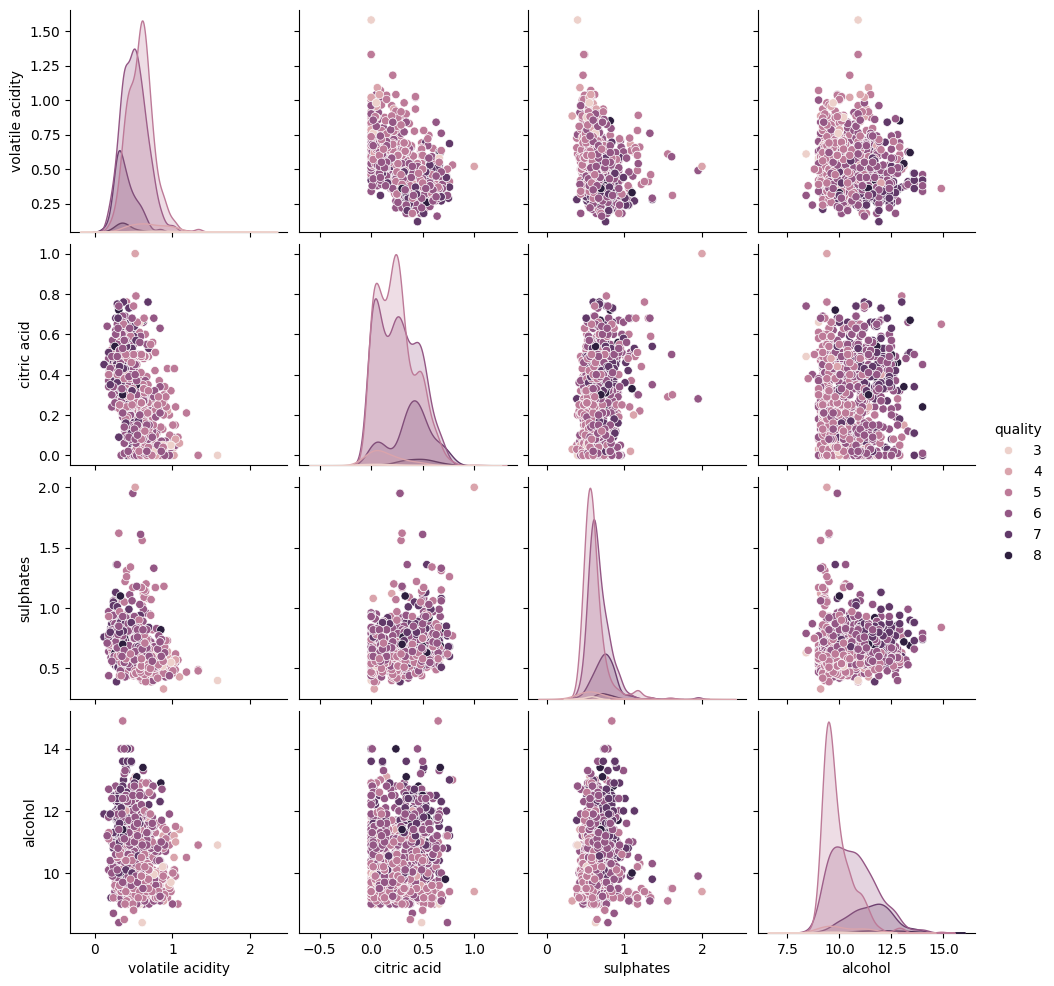

In [191]:
plot_features_num_regression(dfw,"quality", 0.2)

### Funcion: get_features_cat_regression



Esta función recibe como argumentos un dataframe, el nombre de una de las columnas del mismo (argumento 'target_col'), que debería ser el target de un hipotético modelo de regresión, es decir debe ser una variable numérica continua o discreta pero con alta cardinalidad y una variable float "pvalue" cuyo valor por defecto será 0.05.

La función debe devolver una lista con las columnas categóricas del dataframe cuyo test de relación con la columna designada por 'target_col' supere en confianza estadística el test de relación que sea necesario hacer (es decir la función debe poder escoger cuál de los dos test que hemos aprendido tiene que hacer).

La función debe hacer todas las comprobaciones necesarias para no dar error como consecuecia de los valores de entrada. Es decir hará un check de los valores asignados a los argumentos de entrada y si estos no son adecuados debe retornar None y printar por pantalla la razón de este comportamiento. Ojo entre las comprobaciones debe estar que "target_col" hace referencia a una variable numérica continua del dataframe.

In [192]:
def get_features_cat_regression(df, target_col, pvalue=0.05):
    """
    Obtiene las características categóricas significativas para un modelo de regresión.

    Argumentos:
    df (pandas.DataFrame): El DataFrame del que se obtienen las características.
    target_col (str): El nombre de la columna que debe ser el objetivo del modelo de regresión.
    pvalue (float, opcional): Valor de p para realizar el test de hipótesis. Por defecto es 0.05.

    Retorna:
    list or None: Una lista con las características categóricas significativas para el modelo de regresión, o None si hay errores.
    """
    if pvalue <= 0 or pvalue >= 1:
        print("Error: 'pvalue' debe ser un valor entre 0 y 1.")
        return None
    
    significant_cats = []
    for col in df.select_dtypes(include=['object', 'category']).columns:
        grouped = df.groupby(col, observed=True)[target_col].apply(list)
        f_val, p_val = stats.f_oneway(*grouped)
        if p_val <= pvalue:
            significant_cats.append(col)
    return significant_cats

In [193]:
get_features_cat_regression(dfw, 'quality', pvalue=0.05)

C:\Users\annav\AppData\Local\Temp\ipykernel_9900\2517209066.py:20: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  f_val, p_val = stats.f_oneway(*grouped)


['quality_cat', 'quality_cat_6']

### Funcion: plot_features_cat_regression

Esta función recibe un dataframe, una argumento "target_col" con valor por defecto "", una lista de strings ("columns") cuyo valor por defecto es la lista vacía, un argumento ("pvalue") con valor 0.05 por defecto y un argumento "with_individual_plot" a False.

Si la lista no está vacía, la función pintará los histogramas agrupados de la variable "target_col" para cada uno de los valores de las variables categóricas incluidas en columns que cumplan que su test de relación con "target_col" es significatio para el nivel 1-pvalue de significación estadística. La función devolverá los valores de "columns" que cumplan con las condiciones anteriores. 

Si la lista está vacía, entonces la función igualará "columns" a las variables numéricas del dataframe y se comportará como se describe en el párrafo anterior.

De igual manera que en la función descrita anteriormente deberá hacer un check de los valores de entrada y comportarse como se describe en el último párrafo de la función `get_features_cat_regression`.

In [194]:
def plot_features_cat_regression(df, target_col="", columns=[], pvalue=0.05, with_individual_plot=False):
    """
    Visualiza histogramas agrupados para características categóricas en relación con una columna objetivo de un modelo de regresión.

    Argumentos:
    df (pandas.DataFrame): El DataFrame del que se obtienen las características.
    target_col (str, opcional): El nombre de la columna que debe ser el objetivo del modelo de regresión. Por defecto es "".
    columns (list, opcional): Lista de columnas a considerar en los histogramas agrupados. Por defecto es la lista vacía.
    pvalue (float, opcional): Valor de p para realizar el test de hipótesis. Por defecto es 0.05.
    with_individual_plot (bool, opcional): Indica si se deben mostrar los histogramas individuales de cada variable categórica. Por defecto es False.

    Retorna:
    list or None: Una lista con las características que cumplen con los criterios especificados, o None si hay errores.
    """
    significant_features = get_features_cat_regression(df, target_col, pvalue)
    if significant_features is None or not significant_features:
        return None
    for feature in significant_features:
        #if with_individual_plot:
        fig = sns.histplot(data=df, x=feature, hue=target_col, multiple='stack')
        plt.title(f'Histograma agrupado para {feature} en relación con {target_col}')
        plt.xlabel(feature)
        plt.ylabel('Frecuencia')
        plt.show()
    return fig

C:\Users\annav\AppData\Local\Temp\ipykernel_9900\2517209066.py:20: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  f_val, p_val = stats.f_oneway(*grouped)


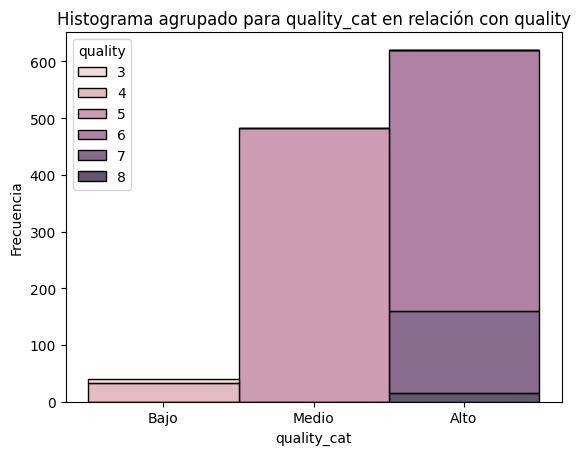

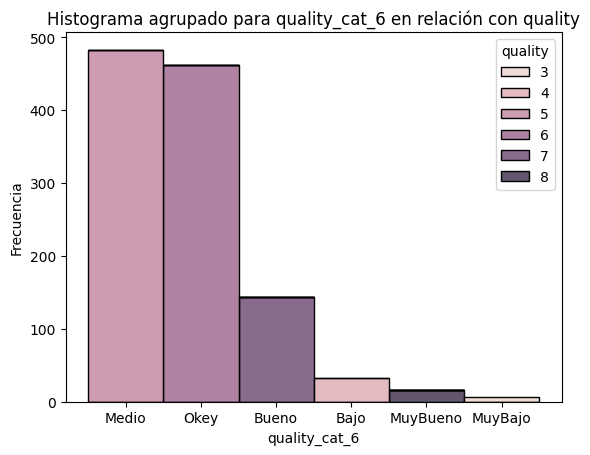

<Axes: title={'center': 'Histograma agrupado para quality_cat_6 en relación con quality'}, xlabel='quality_cat_6', ylabel='Frecuencia'>

In [195]:
plot_features_cat_regression(dfw, "quality", pvalue=0.05)

### Consejos para la distribución del trabajo

Tened en cuenta que hay realmente dos trabajos: desarrollo de las funciones, desarrollo del ejemplo.

Diseñad entre todos el ejemplo (puede ser un dataset conocido al que vais a aplicar todas las funciones, en cuyo caso deberías ir saber que debería devolver cada función). Basícamente esto sería diseñar lo que se conocen como "Test" de las funciones.function

Encargad a uno el desarrollo y ejecución del test y el resto repartíos las funciones. A medida que vayáis teniendo las funciones hechas avisad al "testador" para que pueda ir probándolas y dando feedback. El testador mientras las funciones llegan puede diseñar el esqueleto y unas funciones dummies que se llamen igual que las pedidas y que devuelvan siempre un mismo resultado (ojo un resultado válido para lo que se le pide a cada función)

